In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai2-cohort-5-homework-contest/sample_submission .csv
/kaggle/input/ai2-cohort-5-homework-contest/kmnist_test.csv/kmnist_test.csv
/kaggle/input/ai2-cohort-5-homework-contest/kmnist_train.csv/kmnist_train.csv


In [162]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization

import warnings
warnings.filterwarnings('ignore')

In [145]:
train_df = pd.read_csv("/kaggle/input/ai2-cohort-5-homework-contest/kmnist_train.csv/kmnist_train.csv")
test_df = pd.read_csv("/kaggle/input/ai2-cohort-5-homework-contest/kmnist_test.csv/kmnist_test.csv")

In [146]:
print(train_df.shape)
train_df.head()

(1200, 785)


,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784,output
0,56.514675,24.749116,15.420758,68.951633,13.760997,13.309949,68.951633,68.951633,13.309949,68.951633,...,31.413656,13.309949,23.733776,13.309949,13.309949,13.309949,68.951633,32.487911,13.309949,1
1,13.122449,13.122449,13.122449,13.122449,13.122449,13.122449,43.090392,15.339362,13.122449,13.122449,...,13.122449,13.122449,13.122449,24.566333,13.122449,13.122449,13.122449,13.409452,13.122449,1
2,56.228990,38.733386,43.356041,30.350765,30.350765,101.791573,30.350765,30.350765,101.791573,56.951487,...,30.350765,30.350765,30.350765,30.350765,30.350765,30.350765,50.652863,101.791573,30.350765,0
3,67.072705,33.257721,51.330661,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,...,73.689417,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,17.868622,0
4,17.867347,17.867347,17.867347,28.235052,17.867347,17.867347,17.867347,53.074296,43.465014,17.867347,...,17.867347,28.893451,17.867347,17.867347,17.867347,17.867347,62.989647,17.867347,17.867347,0


- train dataset contains (28,28) pixel values and a output/label column
- 1200 observations

In [147]:
print(test_df.shape)
test_df.head()

(2000, 784)


,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,38.167092,38.167092,54.242517,82.402707,57.519895,38.167092,38.167092,38.167092,38.167092,83.975893,...,38.167092,38.167092,38.167092,38.167092,68.490056,60.846754,38.167092,38.167092,38.167092,38.167092
1,35.295784,21.289541,21.289541,35.614861,21.289541,21.289541,82.447909,21.289541,21.289541,21.289541,...,21.289541,21.289541,25.689617,21.289541,21.289541,21.289541,21.289541,21.289541,35.579927,21.289541
2,21.521684,21.521684,21.521684,21.521684,57.199072,21.521684,21.521684,83.038062,46.479759,64.182483,...,21.521684,21.521684,21.521684,58.240365,83.038062,43.627021,21.521684,21.521684,21.521684,21.521684
3,73.500705,17.146684,45.996388,17.146684,17.146684,17.146684,17.146684,17.146684,73.500705,25.910554,...,17.146684,17.146684,57.801082,17.146684,73.500705,17.146684,17.146684,17.146684,17.146684,17.146684
4,24.724490,24.724490,90.599163,24.724490,24.724490,24.724490,24.724490,53.192570,45.764022,57.982717,...,24.724490,24.724490,24.724490,87.932260,24.724490,24.724490,39.901236,90.599163,24.724490,24.724490


- test dataset only contains (28,28) pixel values.
- no target column
- 2000 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 785 entries, pixel 1 to output
dtypes: float64(784), int64(1)
memory usage: 7.2 MB


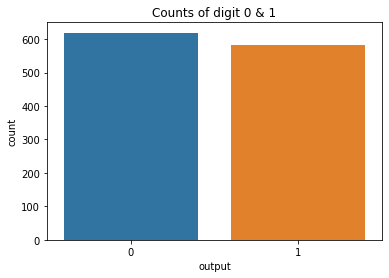

0    619
1    581
Name: output, dtype: int64


In [148]:
#visualization for labels
train_df.info()
sns.countplot(train_df['output'])
plt.title('Counts of digit 0 & 1')
plt.show()
print(train_df['output'].value_counts())

In [149]:
#data preprocessing
X = train_df.drop(['output'],axis=1)
y = train_df.output
print('predictor shape',X.shape)
print('response shape',y.shape)

predictor shape (1200, 784)
response shape (1200,)


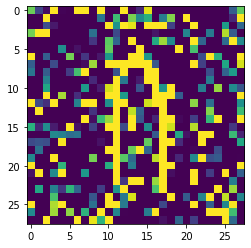

label 1


In [150]:
X0 = X.iloc[:1,:]
img0 = np.reshape(np.asarray(X0),(28,28))
cv2.imwrite('image0.png',img0)
plt.imshow(img0)
plt.show()
print('label',y[0])

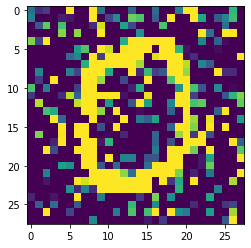

label 0


In [151]:
X1 = X.iloc[2:3,:]
img1 = np.reshape(np.asarray(X1),(28,28))
cv2.imwrite('image1.png',img1)
plt.imshow(img1)
plt.show()
print('label',y[2])

In [152]:
# train validation split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state=42,stratify=train_df.output)
print('---------Train set--------')
print('Input shape :', X_train.shape)
print('Output shape :', y_train.shape)
print('-----Validation set-------')
print('Input shape :', X_val.shape)
print('Output shape :', y_val.shape)

---------Train set--------
Input shape : (960, 784)
Output shape : (960,)
-----Validation set-------
Input shape : (240, 784)
Output shape : (240,)


In [153]:
# standerdizing,reshaping and type checking
height = 28
width = 28
channel = 1
# Standerdizing and data generator creation
train_datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=10,
                             shear_range=0.2,
                             zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
# reshaping
X_train = X_train.values.reshape((X_train.shape[0],height,width,channel))
X_val = X_val.values.reshape((X_val.shape[0],height,width,channel))
# type conversion
y_train, y_val = to_categorical(y_train),to_categorical(y_val)

In [159]:
# creating flow of training batches 
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
X_batch , y_batch = train_generator.next()
print('X_batch shape:', X_batch.shape)
print('y_batch shape:', y_batch.shape)

X_batch shape: (32, 28, 28, 1)
y_batch shape: (32, 2)


In [ ]:
#Building the CNN model
CNN_model = Sequential(name='CNN')
model.add(Conv2D(32,(2,2),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(2,2),activation='relu'))
